In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.74521166, -0.83874542, -1.40105007,  1.79189268,  1.75772842,
         0.4657491 ,  0.03772944,  0.30120549,  1.45706199, -1.09537296],
       [-0.93686376, -0.66496509, -1.29397966,  2.40291513,  2.01472364,
         0.31596827, -0.10226215, -0.57797516, -0.33431899,  0.41597815]])

In [4]:
test_Features[:2]

array([[-0.7266911 , -0.80914155, -0.79946672,  2.08071976,  2.01653346,
        -0.31551576, -0.47351811,  0.07746591,  0.33805752, -1.24650405],
       [-0.94920686, -0.6773877 , -1.20299097,  2.37447003,  3.09609435,
        -0.12073667, -0.37872564,  0.45718652, -0.57207387,  0.69025955]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20*3,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=20*2,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=20,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(10, activation='tanh'))

In [18]:
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 60)             240       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 60)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 40)             7240      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 40)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 20)             2420      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 20)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80)                0         
__________

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 4s 362us/step - loss: 0.6019 - acc: 0.7036 - val_loss: 0.5044 - val_acc: 0.7791
Epoch 2/30
10194/10194 [==============================] - 1s 114us/step - loss: 0.4410 - acc: 0.8042 - val_loss: 0.3975 - val_acc: 0.8184
Epoch 3/30
10194/10194 [==============================] - 1s 101us/step - loss: 0.3816 - acc: 0.8330 - val_loss: 0.3659 - val_acc: 0.8399
Epoch 4/30
10194/10194 [==============================] - 1s 137us/step - loss: 0.3604 - acc: 0.8488 - val_loss: 0.3461 - val_acc: 0.8603
Epoch 5/30
10194/10194 [==============================] - 1s 120us/step - loss: 0.3462 - acc: 0.8569 - val_loss: 0.3353 - val_acc: 0.8631
Epoch 6/30
10194/10194 [==============================] - 1s 128us/step - loss: 0.3429 - acc: 0.8566 - val_loss: 0.3332 - val_acc: 0.8658
Epoch 7/30
10194/10194 [==============================] - 3s 298us/step - loss: 0.3328 - acc: 0.8623 - val_loss: 0.3233 - v

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

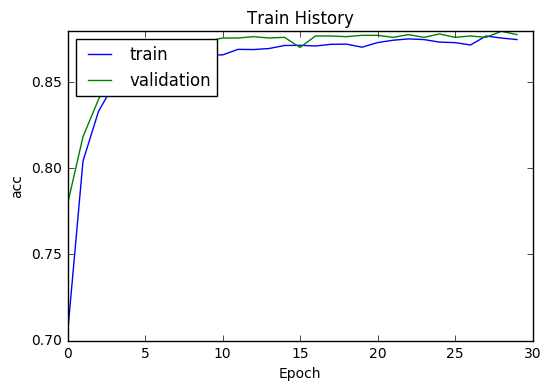

In [23]:
show_train_history(train_history,'acc','val_acc')

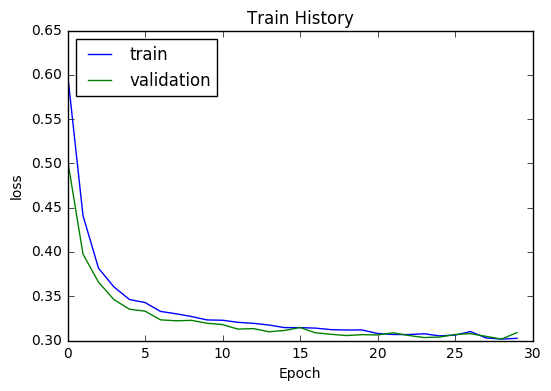

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 2s 253us/step


In [26]:
scores[1]

0.864584992840466